### Problem 7.1 A two-layer network with two hidden units in each layer can be defined as: y = ϕ0 + ϕ1ahψ01 + ψ11a[θ01 + θ11x] + ψ21a[θ02 + θ12x] i +ϕ2a h ψ02 + ψ12a[θ01 + θ11x] + ψ22a[θ02 + θ12x] i , (7.34) where the functions a[•] are ReLU functions. Compute the derivatives of the output y with respect to each of the 13 parameters ϕ• , θ••, and ψ•• directly (i.e., not using the backpropagationalgorithm). The derivative of the ReLU function with respect to its input ∂a[z]/∂z is theindicator function I[z > 0], which returns one if the argument is greater than zero and zero otherwise (figure 7.6).

This is just like 6.5, I don't need more chain rule practice.

### Problem 7.2 Find an expression for the final term in each of the five chains of derivatives in equation 7.12.

\begin{align}
    f_0 &= \beta_0 + \omega_0 x_i \\
    h_1 &= \sin [f_0] \\
    f_1 &= \beta_1 + \omega_1 x_i \\
    h_2 &= \exp [f_1] \\
    f_2 &= \beta_2 + \omega_2 x_i \\
    h_3 &= \cos [f_2] \\
    f_3 &= \beta_3 + \omega_3 x_i \\
    l_i &= (f_3 - y_i)^2 \\
\end{align}

\begin{align}
    \frac{\partial l_i}{\partial f_2} &= \frac{\partial h_3}{\partial f_2} \left( \frac{\partial f_3}{\partial h_3} \frac{\partial l_i}{\partial h_3} \right)\\
    &= \sin[f_2] \cdot \left(2\omega_3(f_3 - y_i)\right) \\
    \frac{\partial l_i}{\partial h_2} &= \frac{\partial f_2}{\partial h_2}\left( \frac{\partial h_3}{\partial f_2} \frac{\partial f_3}{\partial h_3} \frac{\partial l_i}{\partial h_3} \right) \\
    &= -\omega_2\sin[f_2] \cdot \left(2\omega_3(f_3 - y_i)\right) \\
    \frac{\partial l_i}{\partial f_1} &= \frac{\partial h_2}{\partial f_1}\left( \frac{\partial f_2}{\partial h_2}\frac{\partial h_3}{\partial f_2} \frac{\partial f_3}{\partial h_3} \frac{\partial l_i}{\partial h_3} \right) \\
    &= -exp[f_1]\omega_2\sin[f_2] \cdot \left(2\omega_3(f_3 - y_i)\right) \\
\end{align}

...etc.

### Problem 7.3 What size are each of the terms in equation 7.19?

Network size

- $D_{in} = 3$
- $D_1 = 4$
- $D_2 = 2$
- $D_3 = 3$
- $D_o = 2$

From right to left

- $D_o$ x 1
- $D_3$ x $D_o$
- $D_3$ x $D_3$
- $D_2$ x $D_3$
- $D_2$ x $D_2$
- $D_1$ x $D_2$
- $D_1$ x $D_1$

### Problem 7.4 Calculate the derivative ∂ℓi/∂f[xi, ϕ] for the least squares loss function: ℓi = (yi − f[xi, ϕ])2. (7.35)

\begin{align}
    \frac{\partial l_i}{\partial f[x_i, \phi]} &= -2(y_i - f[x_i, \phi])\\
\end{align}

### Problem 7.5 Calculate the derivative ∂ℓi/∂f[xi, ϕ] for the binary classification loss function: ℓi = −(1 − yi) logh1 − sigf[xi, ϕ] i − yi logh sigf[xi, ϕ]i, (7.36) where the function sig[•] is the logistic sigmoid and is defined as: sig[z] = 1 1 + exp[−z]. (7.37)

Did this in problem 6.4

### Problem 7.6∗ Show that for z = β + Ωh: ∂z ∂h = Ω T , where ∂z/∂h is a matrix containing the term ∂zi/∂hj in its i th column and j th row. To do this, first find an expression for the constituent elements ∂zi/∂hj , and then consider the form that the matrix ∂z/∂h must take.

\begin{align}
    \mathbf{z} &= \mathbf{\beta} + \mathbf{\Omega}\mathbf{h} \\
    z_i &= \beta_i + \sum_j \omega_{i, k} h_k \\
    \implies \frac{\partial z_i}{\partial h_j} &=  \omega_{i,j}
\end{align}

So then, by the convention of putting $\frac{\partial \mathbf{z}}{\partial \mathbf{h}}$ in denominator (or Hessian) format, we end up with $\frac{\partial \mathbf{z}}{\partial \mathbf{h}}_{i,j} = \omega_{j,i}$ so $\frac{\partial \mathbf{z}}{\partial \mathbf{h}} = \Omega^T$

### Problem 7.7 Consider the case where we use the logistic sigmoid (see equation 7.37) as an activation function, so h = sig[f]. Compute the derivative ∂h/∂f for this activation function. What happens to the derivative when the input takes (i) a large positive value and (ii) a large negative value?

\begin{align}
    h &= sig[f] \\
    \frac{\partial h}{\partial f} &= \frac{\exp[-f]}{(1 + \exp[-f])^2} \\
    \frac{\partial h}{\partial f} &= sig[f](1 - sig[f]) \\
\end{align}

As $f$ gets very large, $sig[f]$ goes to 1, which means $\frac{\partial h}{\partial f}$ goes to 0.  As $f$ becomes large and negative, $sig[f]$ goes to 0, so, again, $\frac{\partial h}{\partial f}$ goes to 0.

### Problem 7.8 Consider using (i) the Heaviside function and (ii) the rectangular function as activation functions: Heaviside[z] = ( 0 z < 01 z ≥ 0, (7.38) and rect[z] = 0 z < 01 0 ≤ z ≤ 10 z > 1. (7.39) Discuss why these functions are problematic for neural network training with gradient-based optimization methods.

The reason both these functions are problematic is that their derivatives with respect to the inputs are either 0 or infinite (or an appropriately sized delta function), which makes it impossible for optimization based on gradients to propagate meaningful changes to the parameters.

### Problem 7.9∗ Consider a loss function ℓ[f], where f = β + Ωh. We want to find how the loss ℓ changes when we change Ω, which we’ll express with a matrix that contains the derivative∂ℓ/∂Ωij at the ith row and jth column. Find an expression for ∂fi/∂Ωij and, using the chain rule, show that:∂ℓ∂Ω=∂ℓ∂fh

\begin{align}
    \mathbf{f} &= \mathbf{\beta} * \Omega\mathbf{h} \\
    f_i &= \beta_i + \sum_j \omega_{ij}h_j \\
    \frac{\partial f_i}{\partial \omega_{ij}} &= h_j \\
    \frac{\partial l}{\partial \omega_{ij}} &= \frac{\partial l}{\partial f_i}\frac{\partial f_i}{\partial \omega_{ij}} = \frac{\partial l}{\partial f_i}h_j
\end{align}

which we can use to rewrite $\frac{\partial l}{\partial \Omega}$ as the outer product $\frac{\partial l}{\partial \mathbf{f}} \mathbf{h}^T$

### Problem 7.10∗ Derive the equations for the backward pass of the backpropagation algorithm for a network that uses leaky ReLU activations, which are defined as: a[z] = ReLU[z] = (α · z z < 0z z ≥ 0, (7.41) where α is a small positive constant (typically 0.1).

The only piece we need to change from (7.24) is the last term, which is 

\begin{align}
    \frac{\partial l_i}{\partial \mathbf{f}_{k-1}} &= \mathbb{I}[f_{k-1} > 0] \odot \left( \Omega_k^T \frac{\partial l_i}{\partial \mathbf{f}_k}\right)
\end{align}

For a leaky ReLU, this becomes 

\begin{align}
    \frac{\partial l_i}{\partial \mathbf{f}_{k-1}} &= (\alpha \mathbb{I}[f_{k-1} < 0] + \mathbb{I}[f_{k-1} \ge 0]) \odot \left( \Omega_k^T \frac{\partial l_i}{\partial \mathbf{f}_k}\right)
\end{align}

### Problem 7.11 Consider training a network with fifty layers, where we only have enough memory to store the pre-activations at every tenth hidden layer during the forward pass. Explain how to compute the derivatives in this situation using gradient checkpointing.

Very roughly, essentially what we do is we divide the network up into sub-networks of layers with an anchoring layer where we store pre-activations.  We can then re-evaluate the forward pass of the network from anchorning layer k to anchoring layer k+1 (ie redo the forward pass on the sub-network), followed by backpropagating the gradients through this subnetwork. This is sensible on directed graphs because the subnetworks are isolated.

### Problem 7.12∗ This problem explores computing derivatives on general acyclic computational graphs. Consider the function: y = exp exp[x] + exp[x] 2 + sin[exp[x] + exp[x]2]. (7.42)We can break this down into a series of intermediate computations so that f1 = exp[x] f2 = f21 f3 = f1 + f2 f4 = exp[f3] f5 = sin[f3] y = f4 + f5. (7.43) The associated computational graph is depicted in figure 7.9. Compute the derivative ∂y/∂x by reverse-mode differentiation. In other words, compute in order: ∂y∂f5 , ∂y∂f4, ∂y∂f3, ∂y∂f2, ∂y∂f1 and ∂y∂x, (7.44) using the chain rule in each case to make use of the derivatives already computed.

\begin{align}
    y &= \exp[\exp[x] + \exp[x]^2] + \sin[\exp[x] + \exp[x]^2] \\
    f_1 &= \exp[x] \\
    f_2 &= f_1^2 \\
    f_3 &= f_1 + f_2 \\
    f_4 &= \exp[f_3] \\
    f_5 &= \sin[f_3] \\
    y &= f_4 + f_5 \\
\end{align}

\begin{align}
    \frac{\partial y}{\partial f_5} &= 1 \\
    \frac{\partial y}{\partial f_4} &= 1 \\
    \frac{\partial y}{\partial f_3} &= \frac{\partial y}{\partial f_5}\frac{\partial f_5}{\partial f_3} + \frac{\partial y}{\partial f_4}\frac{\partial f_4}{\partial f_3}\\
    &= \cos[f_3] + exp[f_3] \\
    \frac{\partial y}{\partial f_2} &= \frac{\partial y}{\partial f_3}\frac{\partial f_3}{\partial f_2}\\
    &= \cos[f_3] + exp[f_3] \\
    \frac{\partial y}{\partial f_1} &= \frac{\partial y}{\partial f_3}\left(\frac{\partial f_3}{\partial f_1} + \frac{\partial f_3}{\partial f_2}\frac{\partial f_2}{\partial f_1}\right)\\
    &= (\cos[f_3] + exp[f_3]) \cdot (1 + 2f_1) \\    
    \frac{\partial y}{\partial x} &= \frac{\partial y}{\partial f_1}\frac{\partial f_1}{\partial x} \\
    &= (\cos[f_3] + exp[f_3]) \cdot (1 + 2f_1]) \exp[x]\\
    &= (\cos[\exp[x] + \exp[x]^2] + \exp[\exp[x] + \exp[x]^2]) \cdot (1 + 2\exp[x]]) \exp[x]\\
\end{align}

### Problem 7.13∗ For the same function as in problem 7.12, compute the derivative ∂y/∂x by forward-mode differentiation. In other words, compute in order: ∂f1∂x,∂f2∂x,∂f3∂x,∂f4∂x,∂f5∂x, and ∂y∂x, 7.45) using the chain rule in each case to make use of the derivatives already computed. Why do we not use forward-mode differentiation when we calculate the parameter gradients for deep networks?

\begin{align}
    \frac{\partial f_1}{\partial x} &= \exp[x] \\
    \frac{\partial f_2}{\partial x} &= 2 f_1 \frac{\partial f_1}{\partial x} \\
    &= 2 \exp[x]^2 \\
    \frac{\partial f_3}{\partial x} &= \frac{\partial f_1}{\partial x} + \frac{\partial f_2}{\partial x} \\
    &= \exp[x] + 2 \exp[x]^2 \\
    \frac{\partial f_4}{\partial x} &= \exp[f_3] \frac{\partial f_3}{\partial x} \\
    &= \exp[\exp[x] + \exp[x]^2] (\exp[x] + 2 \exp[x]^2) \\
    \frac{\partial f_5}{\partial x} &= \cos[f_3]\frac{\partial f_3}{\partial x} \\
    &= \cos[\exp[x] + \exp[x]^2] (\exp[x] + 2 \exp[x]^2) \\
    \frac{\partial y}{\partial x} &= \frac{\partial f_4}{\partial x} + \frac{\partial f_5}{\partial x} \\
    &= \exp[\exp[x] + \exp[x]^2] (\exp[x] + 2 \exp[x]^2) + \cos[\exp[x] + \exp[x]^2] (\exp[x] + 2 \exp[x]^2)
\end{align}


This problem is not a great illustration of why forward-mode differentiation is not what we want.  Forward-mode differentiation requires us to maintain an ever expanding collection of partial derivatives as each parameter can arbitrarily impact downstream parameters (as far as we can tell). Backwards differentiation, on the other hand, takes advantage of the fact that we can recursively explore the actual network structure and only compute and store partial derivatives we need.

### Problem 7.14 Consider a random variable a with variance Var[a] = σ2and a symmetrical distribution around the mean E[a] = 0. Prove that if we pass this variable through the ReLU function: b = ReLU[a] = (0 a < 0 a a ≥ 0 , (7.46) then the second moment of the transformed variable is E[b2] = σ2/2.

\begin{align}
    E[b^2] &= \int_{-{\infty}}^{\infty} b^2 p[a] da \\
    &= \int_{0}^{\infty} a^2 p[a] da \\
    &= \frac{1}{2} E[a^2] \\
    &= \frac{\sigma^2}{2}
\end{align}

### Problem 7.15 What would you expect to happen if we initialized all of the weights and biases in the network to zero?

The gradients would all be zero and the network would be unable to learn

### Problem 7.16 Implement the code in figure 7.8 in PyTorch and plot the training loss as a function of the number of epochs.

Text(0, 0.5, 'Loss')

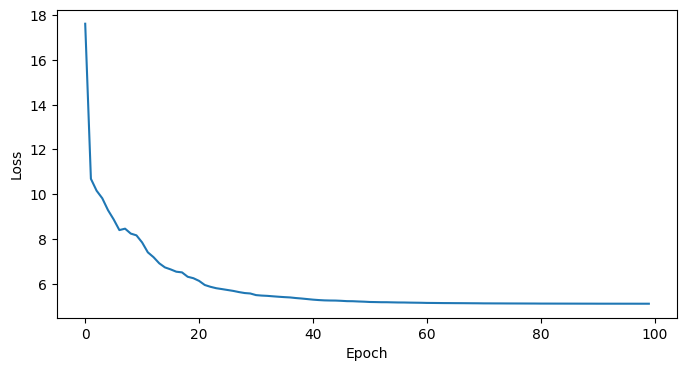

In [10]:
import torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import StepLR

# define input size, hidden layer size, output size
D_i, D_k, D_o = 10, 40, 5
# create model with two hidden layers
model = nn.Sequential(
    nn.Linear(D_i, D_k),
    nn.ReLU(),
    nn.Linear(D_k, D_k),
    nn.ReLU(),
    nn.Linear(D_k, D_o),
)

# He initialization of weights
def weights_init(layer_in):
    if isinstance(layer_in, nn.Linear):
        nn.init.kaiming_normal_(layer_in.weight)
        layer_in.bias.data.fill_(0.0)
model.apply(weights_init)

# choose least squares loss function
criterion = nn.MSELoss()
# construct SGD optimizer and initialize learning rate and momentum
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1, momentum=0.9)
# object that decreases learning rate by half every 10 epochs
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

# create 100 random data points and store in data loader class
x = torch.randn(100, D_i)
y = torch.randn(100, D_o)
data_loader = DataLoader(TensorDataset(x,y), batch_size=10, shuffle=True)


loss_data = []
# loop over the dataset 100 times
for epoch in range(100):
    epoch_loss = 0.0
    # loop over batches
    for i, data in enumerate(data_loader):
        # retrieve inputs and labels for this batch
        x_batch, y_batch = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward pass
        pred = model(x_batch)
        loss = criterion(pred, y_batch)
        # backward pass
        loss.backward()
        # SGD update
        optimizer.step()
        # update statistics
        epoch_loss += loss.item()
        # print error
    loss_data.append((epoch, epoch_loss))
    #print(f'Epoch {epoch:5d}, loss {epoch_loss:.3f}')
    # tell scheduler to consider updating learning rate
    scheduler.step()

epochs, losses = zip(*loss_data)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(epochs, losses)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

### Problem 7.17 Change the code in figure 7.8 to tackle a binary classification problem. You will need to (i) change the targets y so they are binary, (ii) change the network to predict numbers between zero and one (iii) change the loss function appropriately.

Text(0, 0.5, 'Loss')

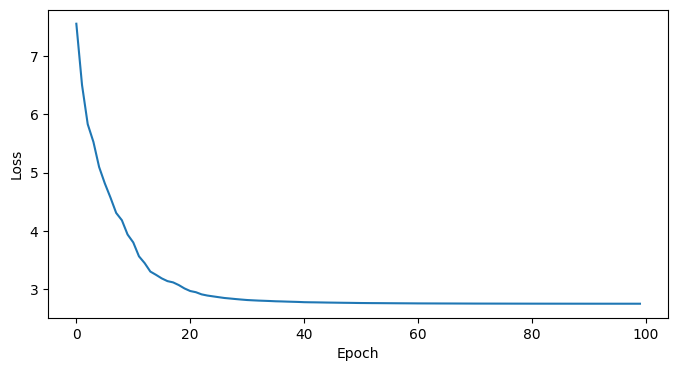

In [22]:
# define input size, hidden layer size, output size
D_i, D_k, D_o = 10, 40, 5
# create model with two hidden layers
model = nn.Sequential(
    nn.Linear(D_i, D_k),
    nn.ReLU(),
    nn.Linear(D_k, D_k),
    nn.ReLU(),
    nn.Linear(D_k, D_o),
    nn.Softmax(dim=1)
)

# He initialization of weights
def weights_init(layer_in):
    if isinstance(layer_in, nn.Linear):
        nn.init.kaiming_normal_(layer_in.weight)
        layer_in.bias.data.fill_(0.0)
model.apply(weights_init)

# choose least squares loss function
criterion = nn.BCELoss()
# construct SGD optimizer and initialize learning rate and momentum
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1, momentum=0.9)
# object that decreases learning rate by half every 10 epochs
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

# create 100 random data points and store in data loader class
x = torch.randn(100, D_i)
y = (torch.randn(100, D_o) > 0.5).float()

data_loader = DataLoader(TensorDataset(x,y), batch_size=10, shuffle=True)


loss_data = []
# loop over the dataset 100 times
for epoch in range(100):
    epoch_loss = 0.0
    # loop over batches
    for i, data in enumerate(data_loader):
        # retrieve inputs and labels for this batch
        x_batch, y_batch = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward pass
        pred = model(x_batch)
        loss = criterion(pred, y_batch)
        # backward pass
        loss.backward()
        # SGD update
        optimizer.step()
        # update statistics
        epoch_loss += loss.item()
        # print error
    loss_data.append((epoch, epoch_loss))
    #print(f'Epoch {epoch:5d}, loss {epoch_loss:.3f}')
    # tell scheduler to consider updating learning rate
    scheduler.step()

epochs, losses = zip(*loss_data)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(epochs, losses)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')